In [1]:
from qampy import signals, impairments, equalisation, phaserec, helpers
from qampy.theory import ber_vs_es_over_n0_qam as ber_theory
from qampy.helpers import normalise_and_center as normcenter
from qampy.core.filter import rrcos_pulseshaping as lowpassFilter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor

from Funcoes import *

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['lines.linewidth'] = 2

In [4]:
M = 64        # ordem da modulação
Fb = 40e9      # taxa de símbolos
SpS = 4         # amostras por símbolo
Fs = SpS*Fb    # taxa de amostragem
SNR = 40        # relação sinal ruído (dB)
rolloff = 0.01  # Rolloff do filtro formatador de pulso
sfm = qam_signal_phase_min(M,Fb,SpS,SNR)
ordem = 4
dataset , X , y = dataset_01(sfm,ordem)

In [5]:
X_train = X[:50000]
X_test = X[50000:]

y_train = y[:50000]
y_test = y[50000:]

In [6]:
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
y_train.shape

(50000,)

In [9]:
forest = RandomForestRegressor(200)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [10]:
y_preds = forest.predict(X_test)

In [11]:
print('rmse = ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('r2 = ', r2_score(y_test, y_preds))

rmse =  0.11838233868703428
r2 =  0.8052077644886594


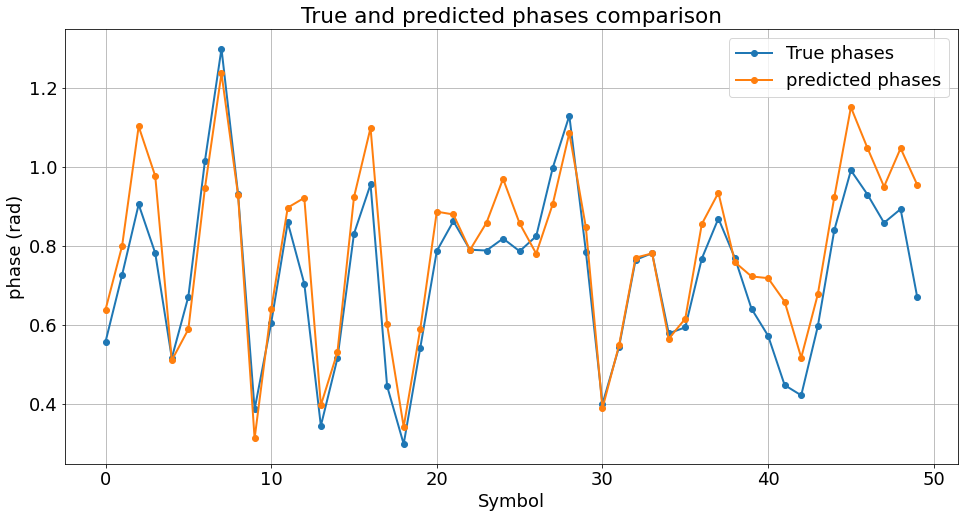

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:50], '-o')
plt.plot(y_preds[:50], '-o')
plt.xlabel('Symbol')
plt.ylabel('phase (rad)')
plt.legend(['True phases', 'predicted phases'])
plt.title('True and predicted phases comparison')
plt.grid(True)
plt.show()

In [13]:
sig_abs = scaler.inverse_transform(X_test)[:].reshape((-1))
size = sig_abs.shape[0]

In [14]:
dataset['amplitudes'].shape

(60000,)

In [15]:
y_preds.shape

(10000,)

In [16]:
sinal = dataset['amplitudes'][50000:]*np.exp(1j*y_preds)

In [17]:
sinal.shape

(10000,)

(array([0.00216263, 0.00246674, 0.00233034, ..., 0.00163008, 0.0028566 ,
        0.00365131]),
 array([-8.0000e+10, -7.9984e+10, -7.9968e+10, ...,  7.9952e+10,
         7.9968e+10,  7.9984e+10]),
 <matplotlib.lines.Line2D at 0x7eff7c637910>)

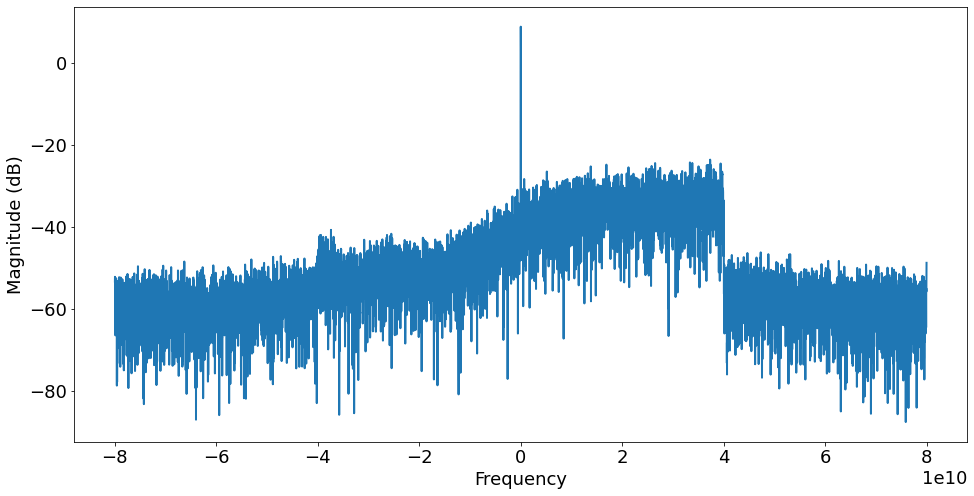

In [18]:
plt.magnitude_spectrum(sinal, Fs=Fs, scale='dB')